# Logistic Regression with PyTorch
## 1. About Logistic Regression


### 1.1 Logistic Regression Basics

#### Classification algorithm
- Example: Spam vs No Spam
    - Input: Bunch of words
    - Output: Probability spam or not

#### Basic Comparison
- **Linear regression**
    - Output: numeric value given inputs
- **Logistic regression**:
    - Output: probability [0, 1] given input belonging to a class
    
    
#### Input/Output Comparison
- **Linear regression: Multiplication**
    - Input: [1]
        - Output: 2
    - Input: [2]
        - Output: 4
    - Trying to model the relationship `y = 2x`
- **Logistic regression: Spam**
    - Input: "Sign up to get 1 million dollars by tonight"
        - Output: p = 0.8
    - Input: "This is a receipt for your recent purchase with Amazon"
        - Output: p = 0.3
    - **p: probability it is spam**
        
            

### 1.2 Problems of Linear Regression
- Example
    - Fever
    - **Input**: temperature
    - **Output**: fever or no fever
- Remember
    - **Linear regression**: minimize error between points and line

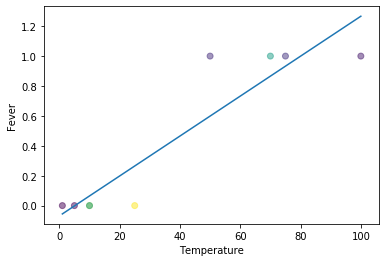

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 5, 10, 10, 25, 50, 70, 75, 100]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

**Linear Regression Problem 1**
<br> Fever value can go negative (below 0) and positive (above 1).


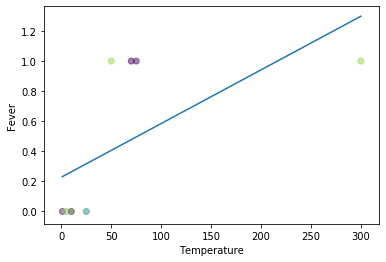

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 300]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

**Linear Regression Problem 2**
<br> Fever points not predicted with outliers.

### 1.3 Logistic Regression In-Depth

#### Predicting Probability
- Linear regression doesn't work
- Instead of predicting direct values: **predict probability**

<img src="https://github.com/ritchieng/deep-learning-wizard/blob/master/docs/deep_learning/practical_pytorch/images/cross_entropy_final_4.png?raw=1" alt="deeplearningwizard" style="width: 900px;"/>

#### Logistic Function $g()$ 
- Two-class logistic regression
- $ y = A x + b$
- $ g(y) = A x + b $
- $g(y) = \frac {1} {1 + e^{-y}} = \frac {1} {1 + e^{-(A x + b)}}$
- $g(y)$ = Estimated probability that $y = 1$ given $x$


#### Softmax Function $g()$ 
- Multi-class logistic regression
- Generalization of logistic function


#### Cross Entropy Function $D()$
- $D(S, L) = L log S - (1-L)log(1-S)$
    - If L = 0 (label)
        - $D(S, 0) = - log(1-S)$
            - $- log(1-S)$: less positive if $S \longrightarrow 0 $
            - $- log(1-S)$: more positive if $S \longrightarrow 1 $ (BIGGER LOSS)
    - If L = 1 (label)
        - $D(S, 1) = log S$
            - $logS$: less negative if $S \longrightarrow 1 $
            - $logS$: more negative if $S \longrightarrow 0 $ (BIGGER LOSS)

In [3]:
import math
print(-math.log(1 - 0.00001))
print(-math.log(1 - 0.99999))

print(math.log(0.99999))
print(math.log(0.00001))

1.0000050000287824e-05
11.51292546497478
-1.0000050000287824e-05
-11.512925464970229


#### Cross Entropy Loss $L$
- Goal: Minimizing Cross Entropy Loss
- $ L = \frac {1}{N} \sum_i D(g(Ax_i + b), L_i)$

## 2. Building a Logistic Regression Model with PyTorch

<img src="https://github.com/ritchieng/deep-learning-wizard/blob/master/docs/deep_learning/practical_pytorch/images/lr2.png?raw=1" alt="deeplearningwizard" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

### Step 1a: Loading MNIST Train Dataset
**Images from 1 to 9**

In [0]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [0]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

In [6]:
len(train_dataset)

60000

In [7]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
type(train_dataset[0])

tuple

In [9]:
# Input Matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [10]:
# Label
train_dataset[0][1]

5

#### Displaying MNIST

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [12]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [0]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

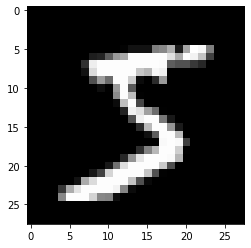

In [14]:
plt.imshow(show_img, cmap='gray')

In [15]:
# Label
train_dataset[0][1]

5

In [0]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)

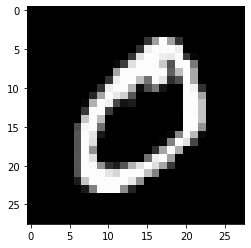

In [17]:
plt.imshow(show_img, cmap='gray')

In [18]:
# Label
train_dataset[1][1]

0

### Step 1b: Loading MNIST Test Dataset
- Show our algorithm works beyond the data we have trained on.
- Out-of-sample

In [0]:
test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [20]:
len(test_dataset)

10000

In [21]:
type(test_dataset[0])

tuple

In [22]:
# Image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

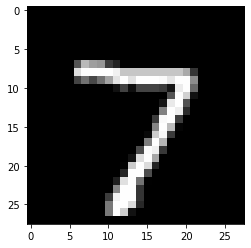

In [23]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [24]:
# Label
test_dataset[0][1]

7

### Step 2: Make Dataset Iterable
- Aim: make the dataset iterable
- **totaldata**: 60000
- **minibatch**: 100
    - Number of examples in 1 iteration
- **iterations**: 3000
    - 1 iteration: one mini-batch forward & backward pass
- **epochs**
    - 1 epoch: running through the whole dataset once
    - $epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{60000}{100} = 5 $
    

In [25]:
len(train_dataset)

60000

In [0]:
batch_size = 100

In [0]:
n_iters = 3000

In [28]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

#### Create Iterable Object: Training Dataset

In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

#### Check Iterability

In [30]:
import collections
isinstance(train_loader, collections.Iterable)

True

#### Create Iterable Object: Testing Dataset

In [0]:
# Iterable object
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

#### Check Iterability

In [32]:
isinstance(test_loader, collections.Iterable)

True

### Step 3: Building Model

In [0]:
# Same as linear regression! 
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

### Step 4: Instantiate Model Class
- Input dimension: 
    - Size of image
    - $28 \times 28 = 784$
- Output dimension: 10
    - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [34]:
# Size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [0]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

### Step 5: Instantiate Loss Class
- **Logistic Regression**: Cross Entropy Loss
    - _Linear Regression: MSE_
   

In [0]:
criterion = nn.CrossEntropyLoss()  

#### What happens in `nn.CrossEntropyLoss()`?
- Computes softmax (logistic/softmax function)
- Computes cross entropy

<img src="https://github.com/ritchieng/deep-learning-wizard/blob/master/docs/deep_learning/practical_pytorch/images/cross_entropy_final_4.png?raw=1" alt="deeplearningwizard" style="width: 900px;"/>

### Step 6: Instantiate Optimizer Class
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
    - **At every iteration, we update our model's parameters**

In [0]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

### Parameters In-Depth

In [38]:
print(model.parameters())

print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x7ff4cc7f5eb8>
2
torch.Size([10, 784])
torch.Size([10])


<img src="https://github.com/ritchieng/deep-learning-wizard/blob/master/docs/deep_learning/practical_pytorch/images/lr_params2.png?raw=1" alt="deeplearningwizard" style="width: 900px;"/>

### Step 7: Train Model
- Process 
    1. Convert inputs/labels to variables
    2. Clear gradient buffets
    3. Get output given inputs 
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [39]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.828819751739502. Accuracy: 66
Iteration: 1000. Loss: 1.6164941787719727. Accuracy: 75
Iteration: 1500. Loss: 1.3092541694641113. Accuracy: 78
Iteration: 2000. Loss: 1.235580563545227. Accuracy: 80
Iteration: 2500. Loss: 0.9882506728172302. Accuracy: 81
Iteration: 3000. Loss: 1.0075889825820923. Accuracy: 82


#### Break Down Accuracy Calculation

In [40]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs)
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([[-5.3113e-01, -1.0376e+00, -4.6718e-01, -2.3832e-01,  3.9108e-02,
         -4.3469e-01, -1.1110e+00,  3.0440e+00, -2.2426e-01,  8.3483e-01],
        [ 4.1897e-02, -1.1547e-01,  1.2949e+00,  7.7148e-01, -1.9290e+00,
          7.5300e-01,  9.5148e-01, -1.9187e+00,  2.1591e-01, -1.7475e+00],
        [-9.0393e-01,  2.3381e+00,  1.5896e-01,  5.3337e-02, -6.1447e-01,
         -3.3328e-01, -1.8178e-01, -1.2244e-01,  1.4468e-01, -4.6219e-01],
        [ 2.8540e+00, -2.4054e+00, -2.6355e-01, -2.8588e-01, -9.9867e-01,
          6.7822e-01,  9.9116e-01,  1.8958e-02, -6.0885e-01, -4.5325e-01],
        [-7.9245e-02, -2.0860e+00,  3.7290e-01, -8.2314e-01,  1.7590e+00,
         -4.1508e-01,  8.9320e-02,  4.0421e-01, -2.5733e-02,  7.9248e-01],
        [-1.3684e+00,  2.8495e+00,  4.1509e-02,  1.3729e-01, -7.3053e-01,
         -4.8295e-01, -7.0727e-01, -8.0229e-02,  3.9847e-01, -2.8356e-01],
        [-1.2957e+00, -1.3127e+00, -7.5100e-01,  2.4548e-01,  1.3076e+00,
          2.0604e-01, -6

In [41]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs.size())
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
torch.Size([100, 10])


In [42]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs[0, :])
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([-0.5311, -1.0376, -0.4672, -0.2383,  0.0391, -0.4347, -1.1110,  3.0440,
        -0.2243,  0.8348], grad_fn=<SliceBackward>)


In [43]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted.size())

PREDICTION
torch.Size([100])


In [44]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])

PREDICTION
tensor(7)


In [45]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])
        
        print('LABEL SIZE')
        print(labels.size())
        
        print('LABEL FOR IMAGE 0')
        print(labels[0])

PREDICTION
tensor(7)
LABEL SIZE
torch.Size([100])
LABEL FOR IMAGE 0
tensor(7)


In [46]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[1])
        
        print('LABEL SIZE')
        print(labels.size())
        
        print('LABEL FOR IMAGE 1')
        print(labels[1])

PREDICTION
tensor(2)
LABEL SIZE
torch.Size([100])
LABEL FOR IMAGE 1
tensor(2)


In [47]:
correct = 0
total = 0
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    # Total number of labels
    total += labels.size(0)

    # Total correct predictions
    correct += (predicted == labels).sum()

accuracy = 100 * (correct.item() / total)

print(accuracy)

82.47


#### Saving Model

In [0]:
save_model = False
if save_model is True:
    # Saves only parameters
    torch.save(model.state_dict(), 'awesome_model.pkl')

## 3. Building a Logistic Regression Model with PyTorch (GPU)



**CPU Version**

In [49]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        # 100 x 10
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                # 100 x 1
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct.item() / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8585511445999146. Accuracy: 67.13
Iteration: 1000. Loss: 1.5915520191192627. Accuracy: 76.49
Iteration: 1500. Loss: 1.3948060274124146. Accuracy: 79.9
Iteration: 2000. Loss: 1.2040984630584717. Accuracy: 81.25
Iteration: 2500. Loss: 1.131636619567871. Accuracy: 82.36
Iteration: 3000. Loss: 0.9151694774627686. Accuracy: 83.13


GPU: 2 things must be on GPU
- `model`
- `variables`

In [50]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                images = images.view(-1, 28*28).to(device)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct.item() / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8681875467300415. Accuracy: 69.52
Iteration: 1000. Loss: 1.5914909839630127. Accuracy: 76.78
Iteration: 1500. Loss: 1.4236671924591064. Accuracy: 79.06
Iteration: 2000. Loss: 1.0975348949432373. Accuracy: 80.97
Iteration: 2500. Loss: 1.0723942518234253. Accuracy: 82.21
Iteration: 3000. Loss: 0.9762925505638123. Accuracy: 83.08


# Summary

- **Logistic regression** basics
- **Problems** of **linear regression**
- **In-depth** Logistic Regression
    1. Get logits
    2. Get softmax
    3. Get cross-entropy loss
- **Aim**: reduce cross-entropy loss
- Built a **logistic regression model** in **CPU and GPU**
    - Step 1: Load Dataset
    - Step 2: Make Dataset Iterable
    - Step 3: Create Model Class
    - Step 4: Instantiate Model Class
    - Step 5: Instantiate Loss Class
    - Step 6: Instantiate Optimizer Class
    - Step 7: Train Model
- Important things to be on **GPU**
    - `model`
    - `tensors with gradients`